In [2]:
# """
#                    Univariate imputation
#                     /                  \
#                    /                    \
#                   /                      \               
#            Numerical                     Categorical
#             *Mean or Median                *Mode
#             *Arbitary value Imputation     *Missing
#             *Random value Imputation
#             *End of distribution

# """

In [1]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('employe_project_data.csv')

In [3]:
df.sample(5)

,EmpID,Age,MonthlyIncome,YearsAtCompany,EducationLevel,JobRole,Attrition
52,P053,33.0,42000.0,NaN,Bachelors,Analyst,No
37,P038,41.0,NaN,15.0,Masters,Scientist,No
212,P213,34.0,43000.0,NaN,Bachelors,Analyst,No
163,P164,46.0,73000.0,19.0,NaN,Scientist,No
48,P049,36.0,46000.0,NaN,Bachelors,Analyst,No


In [4]:
df.isnull().sum()

EmpID              0
Age               50
MonthlyIncome     50
YearsAtCompany    70
EducationLevel    26
JobRole            0
Attrition          0
dtype: int64

In [5]:
df.shape

(250, 7)

<h1> Simple Imputer Mean</h1>

In [6]:
simp = SimpleImputer()

In [7]:
basic = Pipeline(steps = [('imputer', SimpleImputer(strategy='mean', add_indicator=True)) ])

In [8]:
column = ColumnTransformer( transformers= [('simple_imputer',basic, ['Age', 'MonthlyIncome', 'YearsAtCompany'])],remainder='drop')

In [9]:
X = df[['Age', 'MonthlyIncome', 'YearsAtCompany']]
a = column.fit_transform(df)

In [10]:
new_mean = pd.DataFrame(a)

In [11]:
new_mean.iloc[:,:-3]

,0,1,2
0,23.000,25000.0,1.000000
1,35.000,52805.0,8.000000
2,41.175,32000.0,3.000000
3,45.000,70000.0,14.522222
4,29.000,28000.0,4.000000
...,...,...,...
245,55.000,87000.0,27.000000
246,41.175,28000.0,2.000000
247,44.000,52805.0,18.000000
248,36.000,47000.0,14.522222


In [12]:
new_mean.columns = ['Age', 'MonthlyIncome', 'YearsAtCompany', 1,3,3]

<Axes: >

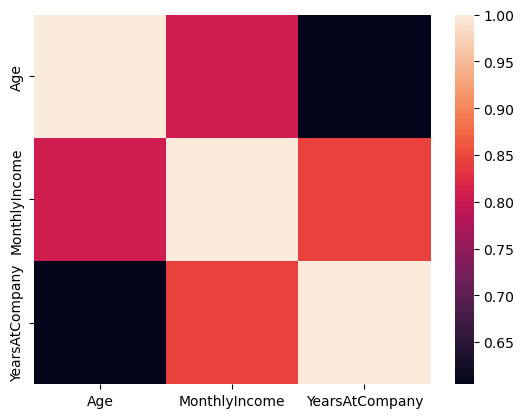

In [13]:
new_mean.iloc[:,:-3].corr()
sns.heatmap(new_mean.iloc[:,:-3].corr())

<h1>Simple Imputter Median</h1>

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [278]:
df = pd.read_csv('handling_missing_data.csv')

In [279]:
df.sample(5)

,EmpID,Age,Salary,Experience,Department,Performance
62,E063,NaN,75000.0,12.0,IT,Excellent
89,E090,NaN,71000.0,8.0,HR,Average
73,E074,45.0,93000.0,18.0,IT,NaN
40,E041,32.0,66000.0,7.0,IT,Good
35,E036,59.0,NaN,34.0,Finance,Excellent


In [280]:
df.isnull().sum()

EmpID           0
Age            15
Salary         15
Experience     15
Department     10
Performance    15
dtype: int64

In [281]:
df.columns

Index(['EmpID', 'Age', 'Salary', 'Experience', 'Department', 'Performance'], dtype='object')

In [282]:
# here we are performing a mean operaion on a missing value  so we want to fill the null value  ['EmpID', 'Age', 'Salary', 'Experience', 'Department', 'Performance']
df = df[['Age', 'Salary', 'Experience']]

In [283]:
aa = df

In [284]:
df.shape

(100, 3)

In [285]:
df.sample(5)

,Age,Salary,Experience
23,42.0,95000.0,NaN
59,48.0,118000.0,20.0
18,26.0,NaN,2.0
29,NaN,68000.0,6.0
25,58.0,180000.0,33.0


In [286]:
df.corr()

,Age,Salary,Experience
Age,1.000000,0.973754,0.993140
Salary,0.973754,1.000000,0.983859
Experience,0.993140,0.983859,1.000000


In [287]:
df.isnull().sum()

Age           15
Salary        15
Experience    15
dtype: int64

In [288]:
100/15

6.666666666666667

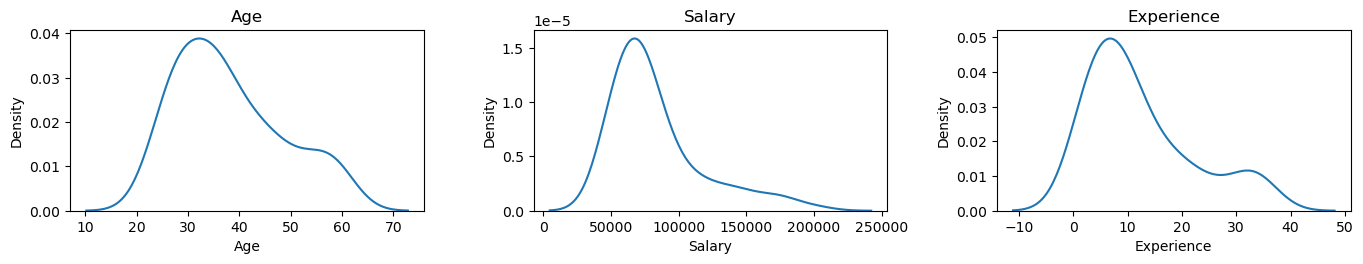

In [289]:
 plt.figure(figsize=(14, 3))
for a,i in enumerate(df.columns):
    plt.subplot(1, 3, a+1)
    sns.kdeplot(data = df[i])
    plt.title(i)
plt.tight_layout(pad=2)
plt.show() # make shore you have applide outside of the function

In [290]:
np.cbrt(df).skew()

Age           0.388384
Salary        1.058716
Experience    0.120060
dtype: float64

In [291]:
np.sqrt(df).skew()

Age           0.452982
Salary        1.179922
Experience    0.396411
dtype: float64

In [292]:
np.reciprocal(df).skew()

Age           0.141872
Salary        0.000000
Experience    2.594549
dtype: float64

In [293]:
dff = pd.DataFrame({'Age' : np.reciprocal(df['Age']), 
                   'Salary' : np.reciprocal(df['Salary']),
                   'Experience' : np.cbrt(df['Experience'])
                  })

In [294]:
df['Age'], df['Salary'], df['Experience'] =  np.reciprocal(df['Age']), np.reciprocal(df['Salary']), np.cbrt(df['Experience'])

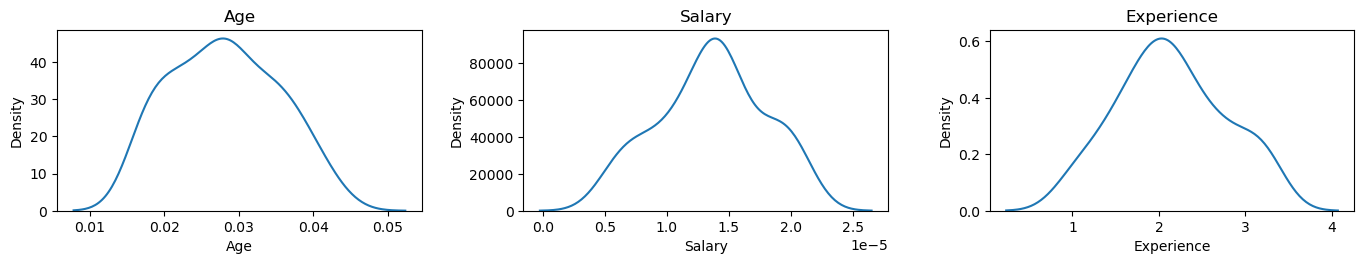

In [295]:
plt.figure(figsize=(14,3))
for a, i in enumerate(df.columns):
    plt.subplot(1,3, a+1)
    sns.kdeplot(data = df[i])
    plt.title(i)
plt.tight_layout(pad = 2)
plt.show()

In [296]:
# now we have a normal data so we can use a standard scalar
# here we are applying a median value for a null value

In [297]:
df.isnull().sum()

Age           15
Salary        15
Experience    15
dtype: int64

In [298]:
# this is first data frame without any transformer
df = aa
std = SimpleImputer(strategy='median')
sim = StandardScaler()

In [303]:
func = ColumnTransformer(transformers=[('receprocal' , FunctionTransformer(np.reciprocal), ['Age', 'Salary']),
                                       ('cbrt', FunctionTransformer(np.cbrt), ['Experience'])
                                      ])

In [304]:
pipe = Pipeline([('to_normal', func), 
                 ('mean', std), 
                 ('scaling', sim),
                ])

In [305]:
df

,Age,Salary,Experience
0,0.040000,0.000020,1.259921
1,0.033333,NaN,1.709976
2,NaN,0.000017,1.587401
3,0.022222,0.000008,NaN
4,0.035714,0.000019,1.442250
...,...,...,...
95,0.016949,NaN,3.239612
96,NaN,0.000015,1.912931
97,0.027027,0.000012,NaN
98,0.035714,NaN,1.587401


In [306]:
mean_transform = pipe.fit_transform(df)

In [307]:
mean_transform.

array([[-1.33932835e+00, -9.98336052e-01, -1.66093505e+00],
       [-8.15334475e-01, -3.02851785e-01, -6.81837311e-01],
       [-1.86541821e-01, -6.82206840e-01, -9.29536483e-01],
       [ 7.56647161e-01,  1.21456843e+00,  8.02632047e-04],
       [-1.02493203e+00, -9.35110210e-01, -1.23994630e+00],
       [ 2.32862880e+00,  3.74360213e+00,  1.75951948e+00],
       [-1.54892590e+00, -1.06156189e+00, -2.33811848e+00],
       [ 2.32653282e-01,  2.66180797e-01,  6.31371449e-01],
       [-2.91340596e-01, -2.08013022e-01,  1.27947561e-01],
       [-1.86541821e-01, -4.29303470e-01, -4.74843488e-01],
       [-9.20133251e-01, -8.71884367e-01,  8.02632047e-04],
       [ 1.28064104e+00, -3.02851785e-01,  1.00256360e+00],
       [-5.00938148e-01, -3.66077628e-01, -1.39582342e-01],
       [ 3.37452058e-01,  2.02954954e-01,  5.44101019e-01],
       [-1.12973080e+00, -9.66723131e-01, -1.23994630e+00],
       [ 1.80463492e+00,  2.16295607e+00,  1.54629147e+00],
       [-1.86541821e-01, -6.18980998e-01